In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.discrete.discrete_model as sd
%matplotlib inline

In [2]:
orig_df = pd.read_csv("/mnt/d/mywork/Stat/FinalProject/dev_factors_2017.csv")
orig_df

,country,pop,gdp,unemployment,gni,primary,secondary,tertiary,mortality_infant_rate,life_expectancy,...,basic_drinking_water,co2,forest_land,broadband,mobile,power,birth_rate,age_15_64,senior,dev
0,Afghanistan,36296111.0,1.875347e+10,11.18,1.900025e+10,102.175789,53.643200,NaN,49.6,64.130,...,66.808703,0.203328,1.850994,0.025297,65.929134,NaN,33.211,53.763223,2.554251,0
1,Albania,2873457.0,1.301969e+10,13.62,1.305148e+10,107.046600,95.265892,57.375259,8.4,78.333,...,94.102097,1.948872,28.792062,10.526845,125.710352,NaN,11.934,68.642614,13.329073,1
2,Algeria,41389174.0,1.700970e+11,13.57,1.675590e+11,111.764481,NaN,47.646832,20.9,76.499,...,93.831977,3.505748,0.815790,7.756294,110.767246,NaN,24.846,64.183205,6.177205,0
3,American Samoa,55617.0,6.120000e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.773772,NaN,86.100000,NaN,NaN,NaN,16.600,NaN,NaN,0
4,Andorra,76997.0,3.000181e+09,NaN,NaN,NaN,NaN,NaN,3.1,NaN,...,99.999999,6.104134,34.042553,44.524097,104.332411,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,"Venezuela, RB",29402480.0,NaN,5.05,NaN,97.150337,88.077019,NaN,21.0,72.246,...,94.217085,5.058757,52.636676,8.869417,83.304822,NaN,18.232,65.085698,6.943682,0
208,Vietnam,94600643.0,2.237799e+11,1.87,2.067823e+11,109.150833,NaN,NaN,16.6,75.241,...,94.814076,2.348081,46.490760,11.913170,126.866130,NaN,16.979,69.871421,7.031028,0
209,"Yemen, Rep.",27834811.0,2.684013e+10,NaN,2.679997e+10,NaN,NaN,NaN,43.3,66.086,...,57.777598,0.361418,1.039832,1.325692,55.175024,NaN,31.040,57.146968,2.851637,0
210,Zambia,16853608.0,2.587360e+10,11.63,2.472679e+10,98.715523,NaN,NaN,44.1,63.043,...,62.989034,0.414748,61.042885,0.213082,79.736910,NaN,36.699,52.503824,2.084807,0


<AxesSubplot:>

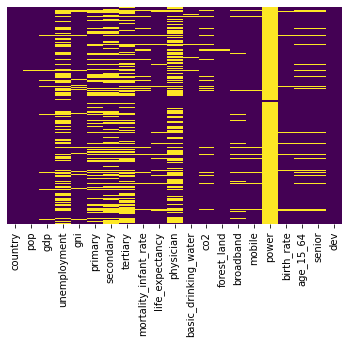

In [3]:
sns.heatmap(orig_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
orig_df.columns

Index(['country', 'pop', 'gdp', 'unemployment', 'gni', 'primary', 'secondary',
       'tertiary', 'mortality_infant_rate', 'life_expectancy', 'physician',
       'basic_drinking_water', 'co2', 'forest_land', 'broadband', 'mobile',
       'power', 'birth_rate', 'age_15_64', 'senior', 'dev'],
      dtype='object')

In [5]:
input_vars = ['pop', 'gdp', 'unemployment', 'gni', 'primary', 'secondary',
              'tertiary', 'mortality_infant_rate', 'life_expectancy', 'physician',
              'basic_drinking_water', 'co2', 'forest_land', 'broadband', 'mobile',
              'birth_rate', 'age_15_64', 'senior']

In [6]:
null_percent = orig_df.isnull().sum()/len(orig_df)*100
null_percent

country                   0.000000
pop                       0.471698
gdp                       3.773585
unemployment             41.037736
gni                       7.075472
primary                  27.830189
secondary                38.679245
tertiary                 40.094340
mortality_infant_rate     8.490566
life_expectancy           7.075472
physician                48.584906
basic_drinking_water      2.358491
co2                       8.962264
forest_land               0.943396
broadband                 7.547170
mobile                    4.245283
power                    99.056604
birth_rate                4.245283
age_15_64                 9.433962
senior                    9.433962
dev                       0.000000
dtype: float64

<AxesSubplot:>

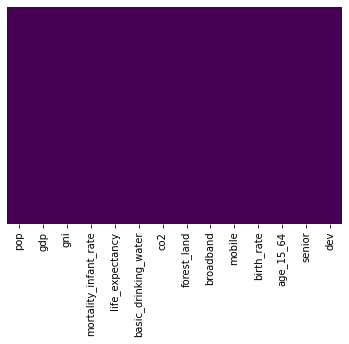

In [7]:
df = orig_df.copy()
df.drop(['country','power'], axis=1,inplace=True)

for i in input_vars:
    df[i].fillna(df[i].mean(), inplace=True)
    
df.drop(['physician', 'tertiary', 'secondary','primary','unemployment'], axis=1,inplace=True)

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [26]:
X = df.copy()
X = X.drop(['dev'], axis=1)
X['const'] = 1.0
y = df['dev'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

In [27]:
model1 = sd.Logit(y_train, X_train)
result1 = model1.fit()
result1.summary()

Optimization terminated successfully.
         Current function value: 0.068271
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    dev   No. Observations:                  148
Model:                          Logit   Df Residuals:                      134
Method:                           MLE   Df Model:                           13
Date:                Fri, 08 Apr 2022   Pseudo R-squ.:                  0.8802
Time:                        15:49:00   Log-Likelihood:                -10.104
converged:                       True   LL-Null:                       -84.306
Covariance Type:            nonrobust   LLR p-value:                 4.319e-25
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
pop                    -2.09e-09   8.28e-09     -0.253      0.801   -1.83e-08    1.41e-08
gdp                    2.608e-13   9.64e-13      0.271      0.787   -1.63e-12    2.15e-12
gni                   -3.844e-13   7.36e-13     -0.523      0.601   -1.83e-12    1.06e-12
mortality_infant_rate    -0.5849      0.261     -2.237      0.025      -1.097      -0.072
life_expectancy          -0.7186      0.374     -1.920      0.055      -1.452       0.015
basic_drinking_water      0.2131      0.438      0.487      0.626      -0.645       1.071
co2                       0.1103      0.284      0.389      0.697      -0.445       0.666
forest_land               0.0067      0.032      0.208      0.835      -0.057       0.070
broadband                 0.3916      0.198      1.980      0.048       0.004       0.779
mobile                   -0.0668      0.045     -1.473      0.141      -0.156       0.022
birth_rate               -0.7605      0.424     -1.794      0.073      -1.592       0.071
age_15_64                -0.8591      0.418     -2.057      0.040      -1.678      -0.040
senior                   -0.3423      0.378     -0.906      0.365      -1.083       0.399
const                   110.0879     63.015      1.747      0.081     -13.419     233.594
=========================================================================================

Possibly complete quasi-separation: A fraction 0.56 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [28]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [29]:
model2.coef_

array([[-7.15870406e-08,  4.03370716e-12, -3.13977457e-13,
        -4.42046880e-14, -7.06084084e-14, -8.07798154e-14,
        -2.26413922e-15, -3.00486315e-14,  4.57231099e-15,
        -1.01247781e-13, -3.20407746e-14, -6.61846075e-14,
        -2.71719634e-17, -1.07493941e-15]])

In [30]:
model2.intercept_

array([-1.07493941e-15])

In [31]:
predictions = model2.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        50
           1       0.67      0.57      0.62        14

    accuracy                           0.84        64
   macro avg       0.78      0.75      0.76        64
weighted avg       0.84      0.84      0.84        64



In [32]:
df1 = orig_df.copy()
df1 = df1[df1['country'].isin(['Thailand','Denmark'])].copy()
df1

,country,pop,gdp,unemployment,gni,primary,secondary,tertiary,mortality_infant_rate,life_expectancy,...,basic_drinking_water,co2,forest_land,broadband,mobile,power,birth_rate,age_15_64,senior,dev
54,Denmark,5764980.0,3.321211e+11,5.83,3.393911e+11,101.268089,129.077484,80.61602,3.4,81.102439,...,100.000001,5.781460,15.64000,43.81980,124.572883,NaN,10.600,63.848815,19.659493,1
189,Thailand,69209817.0,4.563570e+11,0.83,4.359134e+11,99.625031,116.733940,NaN,8.4,76.683000,...,99.769725,3.766229,39.11018,11.85959,175.596494,NaN,10.513,71.209214,11.436964,0


In [33]:
df2 = df1.copy()
df2.drop(['country','power', 'physician', 'tertiary', 'secondary','primary', 'unemployment'], axis=1, inplace=True)
df2

,pop,gdp,gni,mortality_infant_rate,life_expectancy,basic_drinking_water,co2,forest_land,broadband,mobile,birth_rate,age_15_64,senior,dev
54,5764980.0,3.321211e+11,3.393911e+11,3.4,81.102439,100.000001,5.781460,15.64000,43.81980,124.572883,10.600,63.848815,19.659493,1
189,69209817.0,4.563570e+11,4.359134e+11,8.4,76.683000,99.769725,3.766229,39.11018,11.85959,175.596494,10.513,71.209214,11.436964,0


In [34]:
predictions1 = model2.predict(df2)
df1['predict_dev'] = predictions1
df1[['country', 'dev', 'predict_dev']]

/home/oliverwolf/.local/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- dev
Feature names seen at fit time, yet now missing:
- const

  warnings.warn(message, FutureWarning)


,country,dev,predict_dev
54,Denmark,1,1
189,Thailand,0,0
